<a href="https://colab.research.google.com/github/debasisb/covid-19-Hawaii/blob/master/Covid_19_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [2]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [3]:
df.shape

(2161, 5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


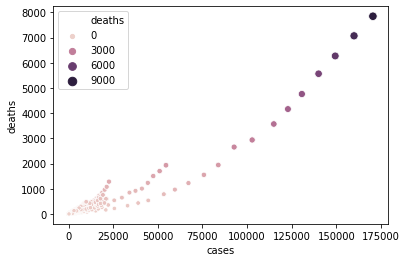

In [4]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-04-10', '2020-04-10', '2020-04-10', '2020-04-10',
               '2020-04-10', '2020-04-10', '2020-04-10', '2020-04-10',
               '2020-04-10', '2020-04-10'],
              dtype='datetime64[ns]', name='date', length=2161, freq=None)

In [6]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-04-12
Two days ago 2020-04-10


In [8]:
df.loc[daybefore:today].head(10)

,state,fips,cases,deaths
date,,,,
2020-04-10,Alabama,1,3008,80
2020-04-10,Alaska,2,244,5
2020-04-10,American Samoa,60,0,0
2020-04-10,Arizona,4,3112,97
2020-04-10,Arkansas,5,1202,24
2020-04-10,California,6,21366,594
2020-04-10,Colorado,8,6510,253
2020-04-10,Connecticut,9,10538,448
2020-04-10,Delaware,10,1326,32


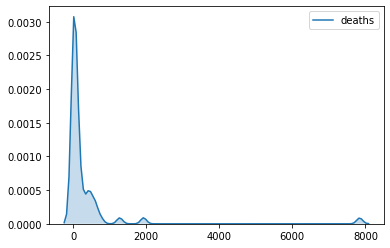

In [9]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

In [10]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-04-10,New York,36,170512,7844
2020-04-10,New Jersey,34,54588,1932
2020-04-10,Michigan,26,22646,1280
2020-04-10,Louisiana,22,19253,755
2020-04-10,Illinois,17,17887,607
2020-04-10,Massachusetts,25,20974,599
2020-04-10,California,6,21366,594
2020-04-10,Washington,53,9887,483
2020-04-10,Connecticut,9,10538,448


In [11]:
current_df.shape

(56, 4)

In [12]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New Jersey',
 'Michigan',
 'Louisiana',
 'Illinois',
 'Massachusetts',
 'California',
 'Washington',
 'Connecticut',
 'Pennsylvania']

In [0]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [14]:
set(top_states_df.state.values)

{'California',
 'Connecticut',
 'Illinois',
 'Louisiana',
 'Massachusetts',
 'Michigan',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Washington'}

<Figure size 1080x360 with 0 Axes>

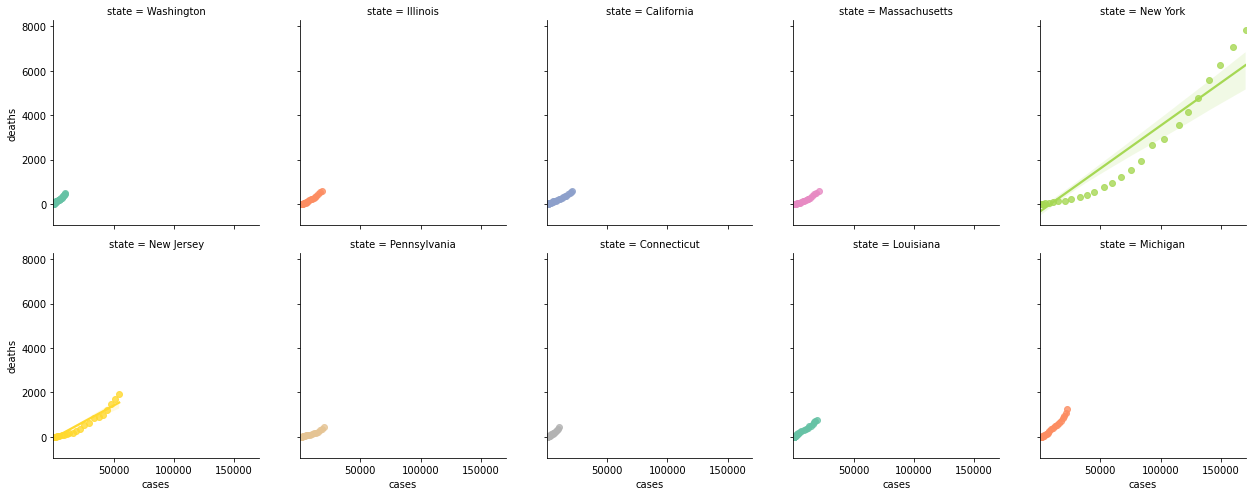

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [18]:
top_states_april_current_df = top_states_df.loc["2020-04-10":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_april_current_df.head(10)

,state,cases,deaths
date,,,
2020-04-10,New York,170512,7844
2020-04-10,New Jersey,54588,1932
2020-04-10,Michigan,22646,1280
2020-04-10,Louisiana,19253,755
2020-04-10,Illinois,17887,607
2020-04-10,Massachusetts,20974,599
2020-04-10,California,21366,594
2020-04-10,Washington,9887,483
2020-04-10,Connecticut,10538,448


In [19]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_april_current_df, x=top_states_april_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

Import County Level Data for Hawaii

In [20]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df["state"].shape
df = df[df["state"] == "Hawaii"]
df.tail(10)

,date,county,state,fips,cases,deaths
43793,2020-04-09,Hawaii,Hawaii,15001.0,28,0
43794,2020-04-09,Honolulu,Hawaii,15003.0,334,4
43795,2020-04-09,Kauai,Hawaii,15007.0,18,0
43796,2020-04-09,Maui,Hawaii,15009.0,57,2
43797,2020-04-09,Unknown,Hawaii,NaN,3,0
46392,2020-04-10,Hawaii,Hawaii,15001.0,31,0
46393,2020-04-10,Honolulu,Hawaii,15003.0,343,5
46394,2020-04-10,Kauai,Hawaii,15007.0,19,0
46395,2020-04-10,Maui,Hawaii,15009.0,66,3
46396,2020-04-10,Unknown,Hawaii,NaN,4,0


In [22]:
Maui_County_df = df[df["county"]== "Maui"].drop(columns = "fips")
Maui_County_df.tail(10)

,date,county,state,cases,deaths
24429,2020-04-01,Maui,Hawaii,26,0
26669,2020-04-02,Maui,Hawaii,27,0
28971,2020-04-03,Maui,Hawaii,36,0
31334,2020-04-04,Maui,Hawaii,38,0
33742,2020-04-05,Maui,Hawaii,43,0
36196,2020-04-06,Maui,Hawaii,44,1
38688,2020-04-07,Maui,Hawaii,48,1
41230,2020-04-08,Maui,Hawaii,54,1
43796,2020-04-09,Maui,Hawaii,57,2
46395,2020-04-10,Maui,Hawaii,66,3


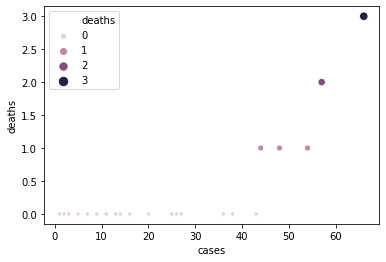

In [23]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Maui_County_df)

<Figure size 1080x360 with 0 Axes>

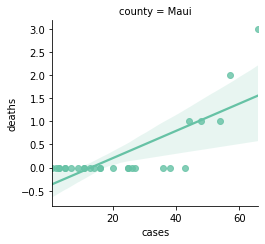

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Maui_County_df)
ax.fig.subplots_adjust(wspace=.2)

In [25]:
Honolulu_County_df = df[df["county"]== "Honolulu"].drop(columns = "fips")
Honolulu_County_df.tail(10)

,date,county,state,cases,deaths
24427,2020-04-01,Honolulu,Hawaii,182,1
26667,2020-04-02,Honolulu,Hawaii,206,2
28969,2020-04-03,Honolulu,Hawaii,237,2
31332,2020-04-04,Honolulu,Hawaii,266,2
33740,2020-04-05,Honolulu,Hawaii,281,2
36194,2020-04-06,Honolulu,Hawaii,292,4
38686,2020-04-07,Honolulu,Hawaii,312,4
41228,2020-04-08,Honolulu,Hawaii,328,4
43794,2020-04-09,Honolulu,Hawaii,334,4
46393,2020-04-10,Honolulu,Hawaii,343,5


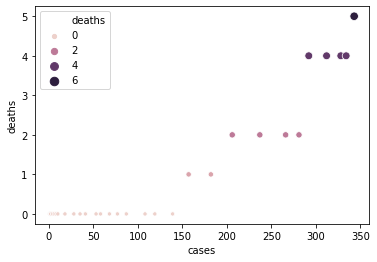

In [26]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Honolulu_County_df)

<Figure size 1080x360 with 0 Axes>

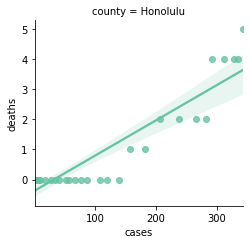

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Honolulu_County_df)
ax.fig.subplots_adjust(wspace=.2)